# Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [611]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.3})
pd.set_option('display.max_columns', None) # To view all the columns of the dataset

In [612]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [613]:
# Generic function to create labels over bar plot
def create_label(ax,type_of_label):
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = 0
        # Vertical alignment for positive values
        va = 'bottom'
    
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
    
        # Use Y value as label and format number with two decimal places
        if type_of_label == 'integer':
            y_value = int(y_value)
            label = "{}".format(y_value)
        else:
            label = "{:.2f}".format(y_value)
    
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Function to modify bar width of seaborn plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

## Data Understanding and Cleansing :

In [614]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


** Here we can see that many columns are having the value 'Select' which basically meant that that user hasn't chose any option and by default the field has been populated by value 'Select'. So we will be treating it as NaN value. **

In [615]:
lead_data = pd.read_csv('Leads.csv',na_values='Select')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


** Data dictionary : **

![title](data_dict.png)

In [616]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [617]:
# Check for statistical information
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [618]:
lead_data.shape

(9240, 37)

In [619]:
#Drop duplicate rows if any
lead_data = lead_data.drop_duplicates()
lead_data.shape

(9240, 37)

** Missing value Analysis **

In [620]:
# summing up the missing values (column-wise)
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [621]:
# Checking the columns having most number of missing values
lead_data.isnull().sum().reset_index().rename({0:'Number of NaN values'},axis=1).sort_values('Number of NaN values',ascending=False)

,index,Number of NaN values
13,How did you hear about X Education,7250
28,Lead Profile,6855
25,Lead Quality,4767
33,Asymmetrique Profile Score,4218
32,Asymmetrique Activity Score,4218
30,Asymmetrique Activity Index,4218
31,Asymmetrique Profile Index,4218
29,City,3669
12,Specialization,3380
24,Tags,3353


In [622]:
# Percentage of missing values column-wise
round(lead_data.isnull().sum()/len(lead_data.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [623]:
lead_data.shape

(9240, 37)

In [624]:
# Drop irrelevant columns with more than 30% null values
cols_to_drop = ['Specialization','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'\
               ,'How did you hear about X Education','Lead Profile','City','Tags']
lead_data = lead_data.drop(cols_to_drop,axis=1)
lead_data.shape

(9240, 27)

In [625]:
round(lead_data.isnull().sum()/len(lead_data.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [626]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [627]:
# We can drop the above column since most of the values are centered around a single option i.e Better Career Prospects
lead_data = lead_data.drop('What matters most to you in choosing a course',axis=1)
lead_data.shape

(9240, 26)

In [628]:
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
China                      2
Ghana                      2
Italy                      2
Belgium                    2
Bangladesh                 2
Uganda                     2
Philippines                2
Netherlands                2
Malaysia                   1
Sri Lanka                  1
Indonesia                  1
Denmark                    1
Vietnam                    1
Tanzania                   1
Liberia       

In [629]:
lead_data.groupby(['Country','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,Country,Converted,Count
19,India,0,4091
20,India,1,2401
52,United States,0,51
48,United Arab Emirates,0,33
49,United Arab Emirates,1,20
53,United States,1,18
36,Saudi Arabia,0,17
38,Singapore,0,13
39,Singapore,1,11
2,Australia,0,10


We can see that most of the leads are from country India, and this variable doesn't have much impact on the conversion rate. So we can drop them.

In [630]:
# We can drop the above column since most of the values are centered around a single option i.e Better Career Prospects
lead_data = lead_data.drop('Country',axis=1)
lead_data.shape

(9240, 25)

In [631]:
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [632]:
lead_data.groupby(['What is your current occupation','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,What is your current occupation,Converted,Count
7,Unemployed,0,3159
8,Unemployed,1,2441
10,Working Professional,1,647
5,Student,0,132
6,Student,1,78
9,Working Professional,0,59
2,Housewife,1,10
4,Other,1,10
3,Other,0,6
1,Businessman,1,5


In [633]:
# Let's impute the missing occupation as Other
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('Other')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [634]:
lead_data.shape

(9240, 25)

In [635]:
lead_data.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content       

In [636]:
round(lead_data.isnull().sum()/len(lead_data.index)*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [637]:
# Lets remove the rows having NaN values for the above columns having null values
lead_data = lead_data.dropna(subset = ['Lead Source'])
lead_data = lead_data.dropna(subset = ['TotalVisits'])
lead_data = lead_data.dropna(subset = ['Page Views Per Visit'])
lead_data = lead_data.dropna(subset = ['Last Activity'])
lead_data.shape

(9074, 25)

In [638]:
lead_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [639]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [640]:
# Drop the prospect id and lead number column since it has no impact, and it is unique for each lead
lead_data = lead_data.drop(['Prospect ID','Lead Number'],axis=1)
lead_data.shape

(9074, 23)

In [641]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                          9074

** Let's now check the columns having only one unique value and drop them accordingly**

In [642]:
lead_data.nunique()

Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the a

In [643]:
lead_data['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [644]:
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [645]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [646]:
lead_data['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [647]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [648]:
cols_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
lead_data = lead_data.drop(cols_to_drop,axis=1)
lead_data.shape

(9074, 18)

In [649]:
lead_data.nunique()

Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

## Exploratory Data Analysis :

In [650]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


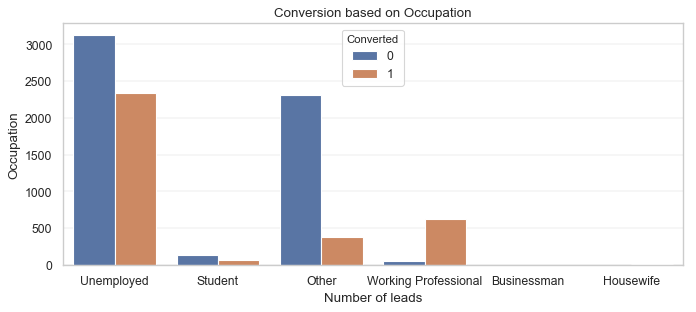

In [651]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.countplot(data=lead_data,x='What is your current occupation',hue='Converted')
plt.title('Conversion based on Occupation')
plt.xlabel('Number of leads')
plt.ylabel('Occupation')
plt.show()

From the above plot we can infer that the conversion rate is highest for leads having occupation as working professional. Also the maximum number of converted leads are unemployed.

In [652]:
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

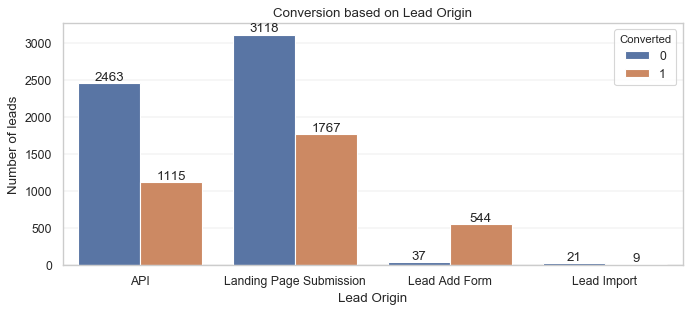

In [653]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.countplot(data=lead_data,x='Lead Origin',hue='Converted')
plt.title('Conversion based on Lead Origin')
plt.ylabel('Number of leads')
plt.xlabel('Lead Origin')
create_label(ax,'integer')
plt.show()

From the above plot it can be observed that lead origin has impact on the conversion rate. The highest conversion rate is for origin as lead add form.

In [654]:
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
youtubechannel          1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [655]:
lead_data.groupby(['Lead Source','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,Lead Source,Converted,Count
2,Direct Traffic,0,1725
6,Google,0,1721
10,Olark Chat,0,1305
7,Google,1,1147
3,Direct Traffic,1,818
12,Organic Search,0,718
11,Olark Chat,1,448
13,Organic Search,1,436
17,Reference,1,410
24,Welingak Website,1,127


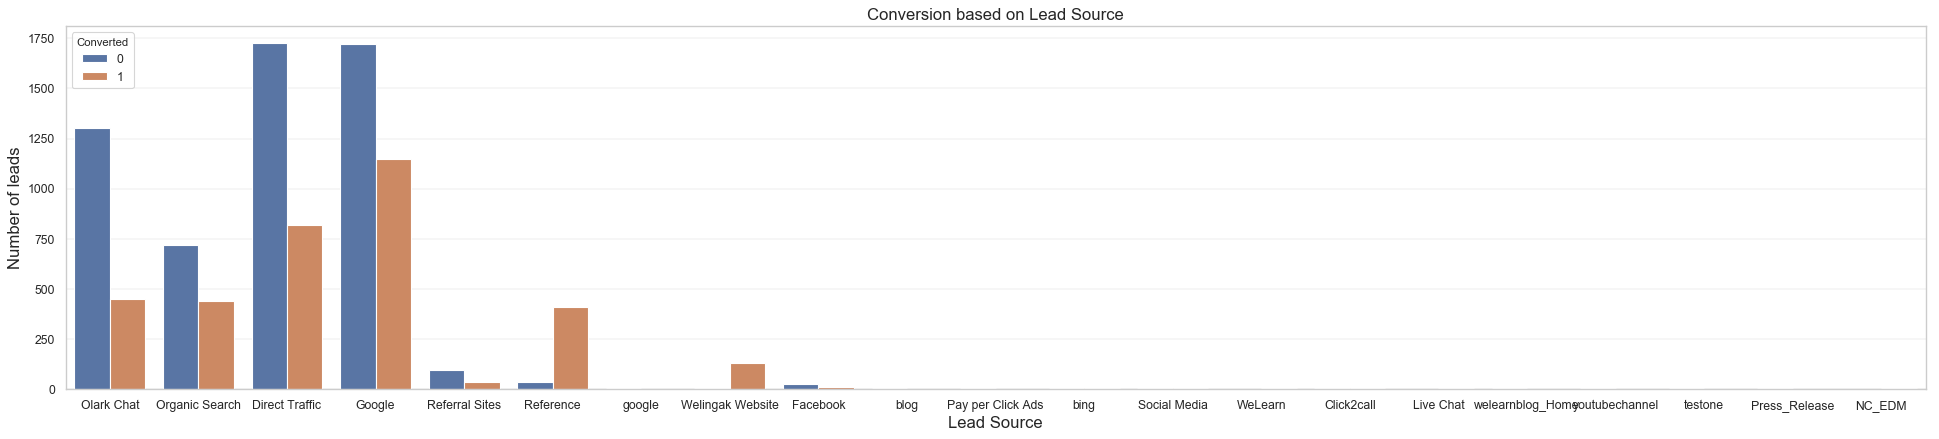

In [656]:
plt.figure(figsize=(30,6),dpi=80)
ax = sns.countplot(data=lead_data,x='Lead Source',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.ylabel('Number of leads',fontsize=15)
plt.xlabel('Lead Source',fontsize=15)
plt.show()

From the above plot we can see that the conversion count is highest for source as google. The conversion rate is also highest for source google.

In [657]:
lead_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [658]:
lead_data.groupby(['Last Activity','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values(['Converted','Count'],ascending=[False,False]).head(10)

,Last Activity,Converted,Count
21,SMS Sent,1,1705
9,Email Opened,1,1250
18,Page Visited on Website,1,151
16,Olark Chat Conversation,1,84
6,Email Link Clicked,1,73
2,Converted to Lead,1,54
23,Unreachable,1,29
12,Form Submitted on Website,1,28
14,Had a Phone Conversation,1,20
4,Email Bounced,1,16


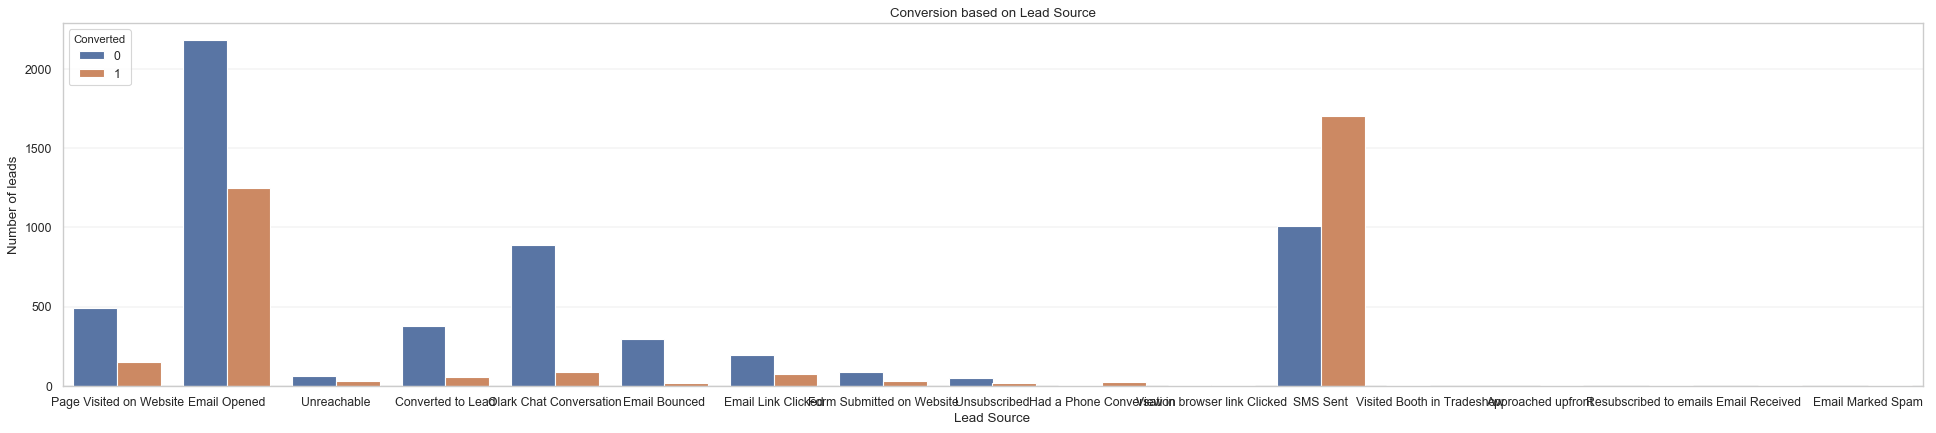

In [659]:
plt.figure(figsize=(30,6),dpi=80)
ax = sns.countplot(data=lead_data,x='Last Activity',hue='Converted')
plt.title('Conversion based on Lead Source')
plt.ylabel('Number of leads')
plt.xlabel('Lead Source')
plt.show()

From the above table and plot we can see that the conversion is highest for last activity SMS Sent.

In [660]:
lead_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

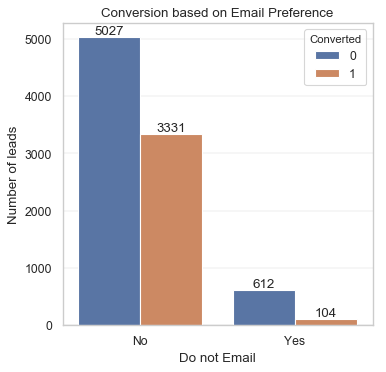

In [661]:
plt.figure(figsize=(5,5),dpi=80)
ax = sns.countplot(data=lead_data,x='Do Not Email',hue='Converted')
plt.title('Conversion based on Email Preference')
plt.ylabel('Number of leads')
plt.xlabel('Do not Email')
create_label(ax,'integer')
plt.show()

It can be observed from above plot that leads who have chosen to be notified by email about the courses are more likely to convert into a hot lead.

In [662]:
lead_data['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [663]:
lead_data['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [664]:
lead_data['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [665]:
lead_data['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [666]:
lead_data['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [667]:
lead_data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [668]:
lead_data['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [669]:
# Drop the above columns having only one predominant option, since it won't make any impact on the conversion rate.
cols_to_drop = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
lead_data = lead_data.drop(cols_to_drop,axis=1)
lead_data.shape

(9074, 11)

In [670]:
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

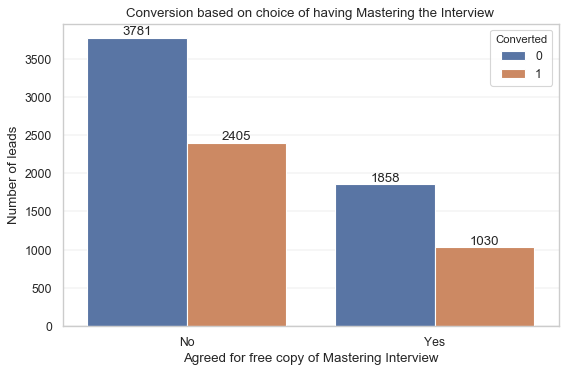

In [671]:
plt.figure(figsize=(8,5),dpi=80)
ax = sns.countplot(data=lead_data,x='A free copy of Mastering The Interview',hue='Converted')
plt.title('Conversion based on choice of having Mastering the Interview')
plt.ylabel('Number of leads')
plt.xlabel('Agreed for free copy of Mastering Interview')
create_label(ax,'integer')
plt.show()

In [672]:
lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

** Checking for outliers **

In [673]:
lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


It can be seen from the above table that outliers exists for columns TotalVisits and Page Views Per Visit since there is a huge change between 99 percentile and maximum value.

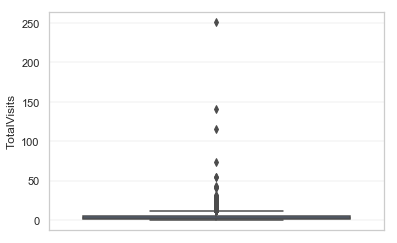

In [674]:
sns.boxplot(y=lead_data['TotalVisits'])

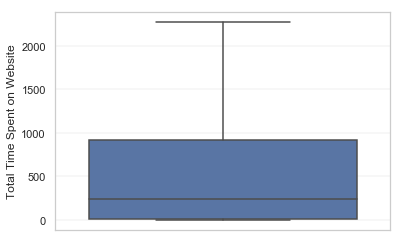

In [675]:
sns.boxplot(y=lead_data['Total Time Spent on Website'])

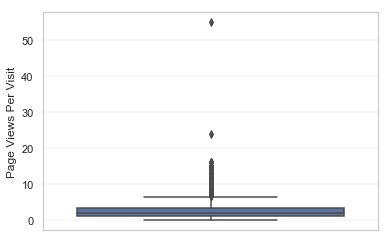

In [676]:
sns.boxplot(y=lead_data['Page Views Per Visit'])

# Outlier Treatment

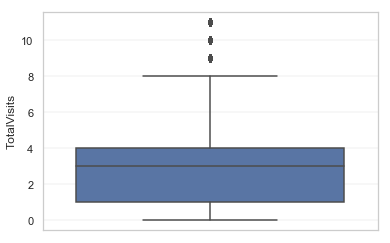

In [677]:
#Outlier removal
Q1 = lead_data.TotalVisits.quantile(0.25)
Q3 = lead_data.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
lead_data = lead_data[(lead_data.TotalVisits >= Q1 - 1.5*IQR) & (lead_data.TotalVisits <= Q3 + 1.5*IQR)]
sns.boxplot(y=lead_data['TotalVisits'])

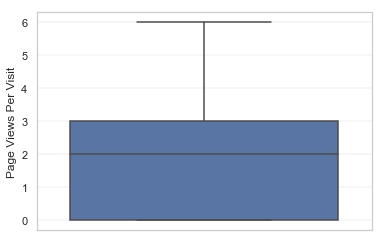

In [678]:
Q1 = lead_data['Page Views Per Visit'].quantile(0.25)
Q3 = lead_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead_data = lead_data[(lead_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
sns.boxplot(y=lead_data['Page Views Per Visit'])

In [679]:
lead_data.shape

(8513, 11)

In [680]:
# Percentage of data retained
lead_data.shape[0]/9240*100

92.13203463203463

## Data Preparation :

In [681]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [682]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [683]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [684]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source','Last Activity','What is your current occupation',\
                                  'Last Notable Activity']], drop_first=True)

dummy1.shape

(8513, 59)

In [685]:
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)
lead_data.shape

(8513, 70)

In [686]:
dummy_col = ['Lead Origin', 'Lead Source','Last Activity','What is your current occupation','Last Notable Activity']
lead_data = lead_data.drop(dummy_col,1)
lead_data.shape

(8513, 65)

In [687]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [688]:
# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(lead_data.corr(),annot = True)
#plt.show()

In [689]:
lead_data.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.137485,-0.019491,-0.041861,0.012703,0.052752,0.098540,-0.030197,-0.016852,0.114621,-0.017141,-0.066718,-0.004418,-0.003124,-0.050209,0.028385,-0.003124,0.037604,-0.035391,-0.008482,-0.004418,-0.003124,0.004286,-0.007655,-0.003124,0.011231,-0.003124,-0.003124,0.037604,-0.064046,0.639117,-0.042881,0.053184,-0.216225,-0.004418,-0.021253,-0.005435,-0.054327,0.056386,-0.003124,-0.020425,0.011417,0.268608,-0.006249,-0.003124,-0.009377,0.048736,0.011417,-0.021177,-0.050189,0.289834,-0.036778,0.053184,-0.185184,-0.003124,-0.003124,-0.010368,0.118869,-0.010650,0.034328,-0.003124,-0.028631,-0.009692,0.247199,-0.003124
Converted,-0.137485,1.000000,0.050589,0.346683,-0.000779,-0.032141,-0.038649,0.310884,-0.007995,-0.072926,-0.009401,0.031225,0.019723,0.013945,-0.127616,-0.009198,-0.008424,-0.008424,0.264230,-0.034805,0.003904,0.013945,0.154979,-0.011507,-0.008424,-0.018842,-0.008424,-0.008424,-0.008424,-0.119171,-0.128091,-0.037025,0.019723,-0.029516,0.019723,-0.033114,0.044432,-0.215801,-0.073283,0.013945,0.347235,-0.008914,-0.025168,-0.016852,-0.008424,0.041855,-0.320428,-0.009982,0.129547,0.316488,-0.038631,-0.033162,0.019723,-0.018472,0.013945,-0.008424,0.039530,-0.267493,-0.075014,-0.028917,0.013945,0.369782,0.039692,-0.017762,-0.008424
TotalVisits,-0.019491,0.050589,1.000000,0.386331,0.752129,0.276090,0.475852,-0.293263,-0.067733,0.144003,-0.065637,0.289198,-0.017759,0.018612,-0.528352,0.257900,0.000801,0.014160,-0.253243,0.084458,-0.002015,-0.003651,-0.137189,-0.007128,0.005254,0.027686,0.009707,-0.003651,0.005254,-0.091627,-0.063825,-0.031172,0.007431,0.078667,0.016877,0.026832,0.017296,-0.232161,0.184855,-0.012557,0.038981,0.034232,0.024413,0.006056,0.005254,-0.005020,-0.072748,-0.031951,0.078347,0.000516,-0.003131,-0.019849,0.007431,0.094567,0.014160,-0.003651,0.022809,-0.159520,-0.068531,0.157395,-0.012557,0.037165,0.019055,0.016840,0.023065
Total Time Spent on Website,-0.041861,0.346683,0.386331,1.000000,0.390166

# Model Building :

** Split the dataset into train and test**

In [690]:
from sklearn.model_selection import train_test_split

In [691]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [692]:
# Putting response variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [693]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

** Feature Scaling **

In [694]:
from sklearn.preprocessing import StandardScaler

In [695]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5123,0,-1.153092,-0.867873,-1.253080,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6322,0,-0.743258,0.108309,-0.648118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3644,0,1.305912,-0.842280,0.561805,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3011,0,0.896078,-0.451076,0.259325,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8140,0,-0.743258,-0.767330,-0.648118,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


** Running Your First Training Model **

In [696]:
import statsmodels.api as sm

In [697]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5902
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2318.1
Date:                Sun, 03 Mar 2019   Deviance:                       4636.2
Time:                        18:40:12   Pearson chi2:                 5.72e+03
No. Iterations:                    22                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.0492   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.4104      0.241     -5.844      0.000      -1.883      -0.937
TotalVisits                                              0.3120      0.057      5.431      0.000       0.199       0.425
Total Time Spent on Website                              1.0976      0.043     25.403      0.000       1.013       1.182
Page Views Per Visit                                    -0.2442      0.065     -3.748      0.000      -0.372      -0.116
A free copy of Mastering The Interview                  -0.1494      0.116     -1.283      0.199      -0.378       0.079
Lead Origin_Landing Page Submission                     -0.1191      0.117     -1.021      0.307      -0.348       0.109
Lead Origin_Lead Add Form                                1.1930      1.483      0.805      0.421      -1.713       4.099
Lead Origin_Lead Import                                 24.6253   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -1.1290      1.957     -0.577      0.564      -4.965       2.707
Lead Source_Facebook                                   -24.8341   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -0.9293      1.954     -0.476      0.634      -4.760       2.901
Lead Source_Live Chat                                   21.8194   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                      23.2243   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   0.2775      1.955      0.142      0.887      -3.555       4.110
Lead Source_Organic Search                              -1.0939      1.958     -0.559      0.576      -4.932       2.744
Lead Source_Pay per Click Ads                          -22.7712   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                            -6.232e-10   1.07e-05  -5.84e-05      1.000   -2.09e-05    2.09e-05
Lead Source_Reference                                    1.3503      1.294      1.043      0.297      -1.186       3.887
Lead Source_Referral Sites                              -1.3336      1.991     -0.670      0.503      -5.236       2.569
Lead Source_Social Media                                24.4046   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WeLearn                                     22.2162   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3.8349      1.628      2.356      0.018       0.645       7.025
Lead Source_bing

### Feature Selection Using RFE

In [698]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [699]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [700]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_blog', False, 36),
 ('Lead Source_google', False, 21),
 ('

In [701]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

** Assessing the model with StatsModels **

In [702]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2383.3
Date:                Sun, 03 Mar 2019   Deviance:                       4766.7
Time:                        18:40:18   Pearson chi2:                 5.80e+03
No. Iterations:                    21                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0027      0.063    -15.835      0.000      -1.127      -0.879
Do Not Email                                            -1.5775      0.196     -8.064      0.000      -1.961      -1.194
Total Time Spent on Website                              1.1049      0.042     26.153      0.000       1.022       1.188
Lead Origin_Lead Add Form                                2.1426      0.947      2.262      0.024       0.286       3.999
Lead Source_Olark Chat                                   1.4403      0.110     13.128      0.000       1.225       1.655
Lead Source_Reference                                    1.6039      0.972      1.651      0.099      -0.300       3.508
Lead Source_Welingak Website                             4.0332      1.384      2.913      0.004       1.320       6.747
Last Activity_Had a Phone Conversation                   3.3623      1.375      2.445      0.014       0.667       6.058
Last Activity_Olark Chat Conversation                   -1.1431      0.178     -6.420      0.000      -1.492      -0.794
Last Activity_SMS Sent                                   1.2994      0.079     16.412      0.000       1.144       1.455
What is your current occupation_Housewife               22.7046   1.78e+04      0.001      0.999   -3.48e+04    3.49e+04
What is your current occupation_Other                   -1.1761      0.090    -13.058      0.000      -1.353      -1.000
What is your current occupation_Working Professional     2.5132      0.197     12.772      0.000       2.128       2.899
Last Notable Activity_Modified                          -0.6980      0.084     -8.341      0.000      -0.862      -0.534
Last Notable Activity_Unreachable                        1.7616      0.598      2.948      0.003       0.590       2.933
Last Notable Activity_Unsubscribed                       1.4191      0.512      2.769      0.006       0.415       2.423
========================================================================================================================
"""

In [703]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5123    0.083527
6322    0.170651
3644    0.067151
3011    0.099834
8140    0.072528
1339    0.888406
211     0.783308
661     0.743855
2120    0.083527
475     0.856313
dtype: float64

In [704]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.0835274 ,  0.17065144,  0.06715085,  0.09983409,  0.07252793,
        0.88840636,  0.78330774,  0.74385454,  0.0835274 ,  0.85631295])

In [705]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.083527,5123
1,0,0.170651,6322
2,0,0.067151,3644
3,0,0.099834,3011
4,0,0.072528,8140


In [706]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.083527,5123,0
1,0,0.170651,6322,0
2,0,0.067151,3644,0
3,0,0.099834,3011,0
4,0,0.072528,8140,0


In [707]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.813559322034


Drop the column having ** p-value > 0.05 **

In [708]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [709]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2387.7
Date:                Sun, 03 Mar 2019   Deviance:                       4775.5
Time:                        18:40:20   Pearson chi2:                 5.81e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9974      0.063    -15.775      0.000      -1.121      -0.874
Do Not Email                                            -1.5816      0.196     -8.086      0.000      -1.965      -1.198
Total Time Spent on Website                              1.1057      0.042     26.182      0.000       1.023       1.188
Lead Origin_Lead Add Form                                2.1376      0.947      2.257      0.024       0.282       3.994
Lead Source_Olark Chat                                   1.4379      0.110     13.114      0.000       1.223       1.653
Lead Source_Reference                                    1.6222      0.971      1.671      0.095      -0.281       3.525
Lead Source_Welingak Website                             4.0343      1.384      2.915      0.004       1.322       6.747
Last Activity_Had a Phone Conversation                   3.3549      1.375      2.439      0.015       0.659       6.051
Last Activity_Olark Chat Conversation                   -1.1495      0.178     -6.457      0.000      -1.498      -0.801
Last Activity_SMS Sent                                   1.2942      0.079     16.356      0.000       1.139       1.449
What is your current occupation_Other                   -1.1803      0.090    -13.110      0.000      -1.357      -1.004
What is your current occupation_Working Professional     2.5072      0.197     12.744      0.000       2.122       2.893
Last Notable Activity_Modified                          -0.6917      0.084     -8.280      0.000      -0.855      -0.528
Last Notable Activity_Unreachable                        1.7582      0.598      2.941      0.003       0.586       2.930
Last Notable Activity_Unsubscribed                       1.4191      0.512      2.769      0.006       0.415       2.424
========================================================================================================================
"""

In [710]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [711]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,67.71
4,Lead Source_Reference,52.97
5,Lead Source_Welingak Website,15.85
3,Lead Source_Olark Chat,1.74
7,Last Activity_Olark Chat Conversation,1.62
11,Last Notable Activity_Modified,1.56
9,What is your current occupation_Other,1.42
1,Total Time Spent on Website,1.29
8,Last Activity_SMS Sent,1.26
0,Do Not Email,1.18


Drop the column Lead Source_Reference since it is having p-value > 0.05 as well as high vif

In [712]:
col = col.drop('Lead Source_Reference', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [713]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2388.9
Date:                Sun, 03 Mar 2019   Deviance:                       4777.9
Time:                        18:40:22   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9979      0.063    -15.786      0.000      -1.122      -0.874
Do Not Email                                            -1.5784      0.195     -8.083      0.000      -1.961      -1.196
Total Time Spent on Website                              1.1052      0.042     26.171      0.000       1.022       1.188
Lead Origin_Lead Add Form                                3.6946      0.227     16.304      0.000       3.250       4.139
Lead Source_Olark Chat                                   1.4364      0.110     13.094      0.000       1.221       1.651
Lead Source_Welingak Website                             2.4763      1.034      2.396      0.017       0.450       4.502
Last Activity_Had a Phone Conversation                   3.3549      1.374      2.441      0.015       0.662       6.048
Last Activity_Olark Chat Conversation                   -1.1486      0.178     -6.453      0.000      -1.497      -0.800
Last Activity_SMS Sent                                   1.2953      0.079     16.376      0.000       1.140       1.450
What is your current occupation_Other                   -1.1800      0.090    -13.107      0.000      -1.356      -1.004
What is your current occupation_Working Professional     2.5096      0.197     12.764      0.000       2.124       2.895
Last Notable Activity_Modified                          -0.6910      0.083     -8.277      0.000      -0.855      -0.527
Last Notable Activity_Unreachable                        1.7599      0.598      2.945      0.003       0.589       2.931
Last Notable Activity_Unsubscribed                       1.4167      0.512      2.765      0.006       0.413       2.421
========================================================================================================================
"""

In [714]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.74
6,Last Activity_Olark Chat Conversation,1.62
10,Last Notable Activity_Modified,1.56
2,Lead Origin_Lead Add Form,1.54
8,What is your current occupation_Other,1.42
4,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.29
7,Last Activity_SMS Sent,1.26
0,Do Not Email,1.18
9,What is your current occupation_Working Profes...,1.17


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [715]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5123    0.083803
6322    0.172325
3644    0.067871
3011    0.100880
8140    0.073304
1339    0.888532
211     0.785455
661     0.744881
2120    0.083803
475     0.850367
dtype: float64

In [716]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.08380296,  0.17232535,  0.06787148,  0.10088001,  0.07330351,
        0.88853246,  0.78545464,  0.74488063,  0.08380296,  0.85036691])

In [717]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.083803,5123
1,0,0.172325,6322
2,0,0.067871,3644
3,0,0.100880,3011
4,0,0.073304,8140


In [718]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.083803,5123,0
1,0,0.172325,6322,0
2,0,0.067871,3644,0
3,0,0.100880,3011,0
4,0,0.073304,8140,0


In [719]:
from sklearn import metrics

In [720]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3286  420]
 [ 695 1558]]


In [721]:
# Actual/Predicted     not_conv    conv
        # not_conv       3286       420
        # conv           695       1558  

In [722]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.812888068468


It can be seen that the accuracy hasn't dropped much.

In [723]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [724]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6915224145583666

In [725]:
# Let us calculate specificity
TN / float(TN+FP)

0.88667026443604968

In [726]:
# positive predictive value 
print (TP / float(TP+FP))

0.787664307381


In [727]:
# Negative predictive value
print (TN / float(TN+ FN))

0.825420748556


In [728]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.83      0.89      0.85      3706
          1       0.79      0.69      0.74      2253

avg / total       0.81      0.81      0.81      5959



So it can be seen that with a cutoff value of 0.5 the precision is coming as 79% , recall  69% and accuracy 81%. We will check the metrics for different cutoff values in later part of the notebook and will arrive at a proper cutoff value.

** Plotting the ROC Curve **

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [729]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [730]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

In [731]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.29227475052655216

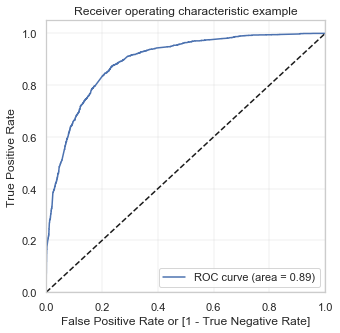

In [732]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [733]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0


In [734]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.644739  0.972037  0.445764
0.2   0.2  0.767075  0.922326  0.672693
0.3   0.3  0.805336  0.869951  0.766055
0.4   0.4  0.816412  0.778961  0.839180
0.5   0.5  0.812888  0.691522  0.886670
0.6   0.6  0.804665  0.617843  0.918241
0.7   0.7  0.778990  0.505104  0.945494
0.8   0.8  0.758181  0.414115  0.967350
0.9   0.9  0.716395  0.269419  0.988127


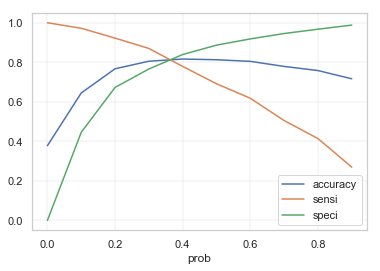

In [735]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

** Let's take the cutoff as 0.55 and check the metrics **

In [736]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head(10)

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [737]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80986742742070816

In [738]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3359,  347],
       [ 786, 1467]], dtype=int64)

In [739]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [740]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.65113182423435423

In [741]:
# Let us calculate specificity
TN / float(TN+FP)

0.90636805180787916

In [742]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0936319481921


In [743]:
# Positive predictive value 
print (TP / float(TP+FP))

0.808710033076


In [744]:
# Negative predictive value
print (TN / float(TN+ FN))

0.810373944511


In [745]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86      3706
          1       0.81      0.65      0.72      2253

avg / total       0.81      0.81      0.80      5959



In [746]:
from sklearn.metrics import precision_score, recall_score

In [747]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80871003307607492

In [748]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.65113182423435423

In [749]:
from sklearn.metrics import precision_recall_curve

In [750]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

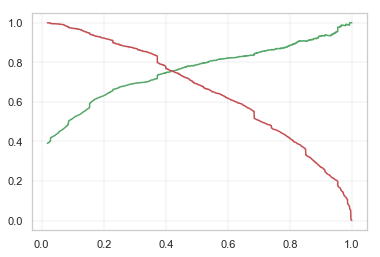

In [751]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Hence with cutoff value 0.55 we can see that we are getting a good model with accuracy 81% , precision 81% and recall 65%. We will try to increase the recall a little bit. But before that let's check how the metrics are coming for the test dataset with this cutoff and model.

#### Making predictions on the test set

In [752]:
X_test_copy = X_test.copy()

In [753]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
7358,0,-0.175247,0,0,0,0,0,0,0,0,1,0,0
8398,0,2.613513,0,0,0,0,0,0,0,0,1,0,0
3472,0,-0.578193,0,0,0,0,0,0,1,0,0,0,0
8673,0,0.709359,0,0,0,0,0,0,1,0,0,0,0
8053,0,1.535867,0,0,0,0,0,1,0,0,0,0,0


In [754]:
#X_test.drop('What is your current occupation_Housewife',axis=1,inplace=True)

In [755]:
X_test_sm = sm.add_constant(X_test)

In [756]:
y_test_pred = res.predict(X_test_sm)

In [757]:
y_test_pred[:10]

7358    0.132087
8398    0.768451
3472    0.056414
8673    0.198781
8053    0.880260
6385    0.177801
5396    0.128474
7152    0.083734
7013    0.538824
7903    0.154251
dtype: float64

In [758]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [759]:
# Let's see the head
y_pred_1.head()

,0
7358,0.132087
8398,0.768451
3472,0.056414
8673,0.198781
8053,0.880260


In [760]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [761]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [762]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [763]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [764]:
y_pred_final.head()

,Converted,LeadID,0
0,0,7358,0.132087
1,0,8398,0.768451
2,0,3472,0.056414
3,1,8673,0.198781
4,1,8053,0.880260


In [765]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [766]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conv_Prob'], axis=1)

In [767]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conv_Prob
0,7358,0,0.132087
1,8398,0,0.768451
2,3472,0,0.056414
3,8673,1,0.198781
4,8053,1,0.880260


In [768]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [769]:
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [770]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.82184808144087707

In [771]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1457,  144],
       [ 311,  642]], dtype=int64)

In [772]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [773]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.67366211962224554

In [774]:
# Let us calculate specificity
TN / float(TN+FP)

0.91005621486570898

In [775]:
# Precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.81679389312977102

In [776]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1601
          1       0.82      0.67      0.74       953

avg / total       0.82      0.82      0.82      2554



So with the model that we built, it is having a good fitting on the test set also. Accuracy is 82% , Precision 82% and recall 67%. This was when we took the cutoff as 0.55. Now we will slightly vary the cutoff to get a precision of around 80% and slightly increase the value of recall.

### Cut Off : 0.51 

** Train set **

In [777]:
train1=y_train_pred_final.copy()

In [778]:
train1['final_predicted'] = train1.Conv_Prob.map( lambda x: 1 if x > 0.51 else 0)

train1.head(10)

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [779]:
# Let's check the overall accuracy.
metrics.accuracy_score(train1.Converted, train1.final_predicted)

0.81288806846786377

In [780]:
confusion2 = metrics.confusion_matrix(train1.Converted, train1.final_predicted )
confusion2

array([[3303,  403],
       [ 712, 1541]], dtype=int64)

In [781]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [782]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.68397691966267204

In [783]:
# Let us calculate specificity
TN / float(TN+FP)

0.89125742039935241

In [784]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.108742579601


In [785]:
# Positive predictive value 
print (TP / float(TP+FP))

0.792695473251


In [786]:
# Negative predictive value
print (TN / float(TN+ FN))

0.822665006227


In [787]:
# Precision and Recall
print("Precision : {}".format(precision_score(train1.Converted, train1.final_predicted)))
print("Recall : {}".format(recall_score(train1.Converted, train1.final_predicted)))

Precision : 0.7926954732510288
Recall : 0.683976919662672


In [788]:
from sklearn.metrics import classification_report
print(classification_report(train1.Converted, train1.final_predicted))

             precision    recall  f1-score   support

          0       0.82      0.89      0.86      3706
          1       0.79      0.68      0.73      2253

avg / total       0.81      0.81      0.81      5959



** Precision = 0.79, Recall = 0.68 and Accuracy = 0.81 **

** Test set **

In [789]:
test1 = y_pred_final.copy()
test1.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [790]:
test1['final_predicted'] = test1.Conv_Prob.map(lambda x: 1 if x > 0.51 else 0)

In [791]:
# Let's check the overall accuracy.
metrics.accuracy_score(test1.Converted, test1.final_predicted)

0.82028191072826939

In [792]:
confusion2 = metrics.confusion_matrix(test1.Converted, test1.final_predicted )
confusion2

array([[1427,  174],
       [ 285,  668]], dtype=int64)

In [793]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [794]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.70094438614900312

In [795]:
# Let us calculate specificity
TN / float(TN+FP)

0.89131792629606499

In [796]:
# Precision and Recall
print("Precision : {}".format(precision_score(test1.Converted, test1.final_predicted)))
print("Recall : {}".format(recall_score(test1.Converted, test1.final_predicted)))

Precision : 0.7933491686460807
Recall : 0.7009443861490031


In [797]:
from sklearn.metrics import classification_report
print(classification_report(test1.Converted, test1.final_predicted))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1601
          1       0.79      0.70      0.74       953

avg / total       0.82      0.82      0.82      2554



** Precision = 0.79, Recall = 0.70 and Accuracy = 0.81 **

### Cut Off : 0.52

** Train set **

In [798]:
train2=y_train_pred_final.copy()

In [799]:
train2['final_predicted'] = train2.Conv_Prob.map( lambda x: 1 if x > 0.52 else 0)

train2.head(10)

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [800]:
# Let's check the overall accuracy.
metrics.accuracy_score(train2.Converted, train2.final_predicted)

0.81221681490182918

In [801]:
confusion2 = metrics.confusion_matrix(train2.Converted, train2.final_predicted )
confusion2

array([[3313,  393],
       [ 726, 1527]], dtype=int64)

In [802]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [803]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.677762982689747

In [804]:
# Let us calculate specificity
TN / float(TN+FP)

0.89395574743658934

In [805]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.106044252563


In [806]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7953125


In [807]:
# Negative predictive value
print (TN / float(TN+ FN))

0.820252537757


In [808]:
# Precision and Recall
print("Precision : {}".format(precision_score(train2.Converted, train2.final_predicted)))
print("Recall : {}".format(recall_score(train2.Converted, train2.final_predicted)))

Precision : 0.7953125
Recall : 0.677762982689747


In [809]:
from sklearn.metrics import classification_report
print(classification_report(train2.Converted, train2.final_predicted))

             precision    recall  f1-score   support

          0       0.82      0.89      0.86      3706
          1       0.80      0.68      0.73      2253

avg / total       0.81      0.81      0.81      5959



** Precision = 0.80, Recall = 0.68 and Accuracy = 0.81 **

** Test set **

In [810]:
test2 = y_pred_final.copy()
test2.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [811]:
test2['final_predicted'] = test2.Conv_Prob.map(lambda x: 1 if x > 0.52 else 0)

In [812]:
# Let's check the overall accuracy.
metrics.accuracy_score(test2.Converted, test2.final_predicted)

0.82067345340642128

In [813]:
confusion2 = metrics.confusion_matrix(test2.Converted, test2.final_predicted )
confusion2

array([[1434,  167],
       [ 291,  662]], dtype=int64)

In [814]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [815]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.69464847848898215

In [816]:
# Let us calculate specificity
TN / float(TN+FP)

0.89569019362898183

In [817]:
# Precision and Recall
print("Precision : {}".format(precision_score(test2.Converted, test2.final_predicted)))
print("Recall : {}".format(recall_score(test2.Converted, test2.final_predicted)))

Precision : 0.7985524728588661
Recall : 0.6946484784889821


In [818]:
from sklearn.metrics import classification_report
print(classification_report(test2.Converted, test2.final_predicted))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1601
          1       0.80      0.69      0.74       953

avg / total       0.82      0.82      0.82      2554



** Precision = 0.80, Recall = 0.69 and Accuracy = 0.82 **

### Cut Off : 0.53

** Train set **

In [819]:
train3 = y_train_pred_final.copy()

In [820]:
train3['final_predicted'] = train3.Conv_Prob.map( lambda x: 1 if x > 0.53 else 0)

train3.head(10)

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.888532,1339,1,1,1,1,1,1,1,1,1,1,0,1
6,1,0.785455,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.744881,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.083803,2120,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.850367,475,1,1,1,1,1,1,1,1,1,1,0,1


In [821]:
# Let's check the overall accuracy.
metrics.accuracy_score(train3.Converted, train3.final_predicted)

0.80986742742070816

In [822]:
confusion2 = metrics.confusion_matrix(train3.Converted, train3.final_predicted )
confusion2

array([[3326,  380],
       [ 753, 1500]], dtype=int64)

In [823]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [824]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.66577896138482029

In [825]:
# Let us calculate specificity
TN / float(TN+FP)

0.89746357258499732

In [826]:
# Precision and Recall
print("Precision : {}".format(precision_score(train3.Converted, train3.final_predicted)))
print("Recall : {}".format(recall_score(train3.Converted, train3.final_predicted)))

Precision : 0.7978723404255319
Recall : 0.6657789613848203


In [827]:
from sklearn.metrics import classification_report
print(classification_report(train3.Converted, train3.final_predicted))

             precision    recall  f1-score   support

          0       0.82      0.90      0.85      3706
          1       0.80      0.67      0.73      2253

avg / total       0.81      0.81      0.81      5959



Observation : Recall decreases with cutoff value 0.53 on training set 

** Test Set **

In [828]:
test3 = y_pred_final.copy()
test3.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [829]:
test3['final_predicted'] = test3.Conv_Prob.map(lambda x: 1 if x > 0.53 else 0)

In [830]:
# Let's check the overall accuracy.
metrics.accuracy_score(test3.Converted, test3.final_predicted)

0.82067345340642128

In [831]:
confusion2 = metrics.confusion_matrix(test3.Converted, test3.final_predicted )
confusion2

array([[1442,  159],
       [ 299,  654]], dtype=int64)

In [832]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [833]:
from sklearn.metrics import classification_report
print(classification_report(test3.Converted, test3.final_predicted))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1601
          1       0.80      0.69      0.74       953

avg / total       0.82      0.82      0.82      2554



Metrics are same as that of cutoff value 0.52 on test set.

** Hence we can see that with a cutoff value of 0.52 we are getting fairly good results on both train and test set. So we can settle with this cutoff for our prediction model **

Metrics with cutoff value : 0.52 <br>

<table style="width:50%">
  <tr>
    <th>Metric</th>
    <th>Train</th> 
    <th>Test</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.81</td> 
    <td>0.82</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.80</td> 
    <td>0.80</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.68</td> 
    <td>0.69</td>
  </tr>
</table>

### Calculate Lead Score on Train and Test Data 

** Calculate lead score on train data **

In [834]:
# Inspecting final predicted train dataframe
y_train_pred_fnl = train2
y_train_pred_fnl.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083803,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.172325,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.067871,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100880,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.073304,8140,0,1,0,0,0,0,0,0,0,0,0,0


In [835]:
# Selecting only required columns
y_train_lead_score = y_train_pred_fnl[['LeadID','Converted','Conv_Prob','final_predicted']]
y_train_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,5123,0,0.083803,0
1,6322,0,0.172325,0
2,3644,0,0.067871,0
3,3011,0,0.100880,0
4,8140,0,0.073304,0


In [836]:
# Calculate lead score
y_train_lead_score['Lead Score'] = y_train_lead_score['Conv_Prob'] * 100
y_train_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,5123,0,0.083803,0,8.380296
1,6322,0,0.172325,0,17.232535
2,3644,0,0.067871,0,6.787148
3,3011,0,0.100880,0,10.088001
4,8140,0,0.073304,0,7.330351


** Calculate lead score on test data **

In [837]:
# Inspecting final predicted test dataframe
y_test_pred_fnl = test2
y_test_pred_fnl.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.132087,0
1,8398,0,0.768451,1
2,3472,0,0.056414,0
3,8673,1,0.198781,0
4,8053,1,0.880260,1


In [838]:
y_test_lead_score = y_test_pred_fnl

# Calculate lead score
y_test_lead_score['Lead Score'] = y_test_lead_score['Conv_Prob'] * 100
y_test_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,7358,0,0.132087,0,13.208701
1,8398,0,0.768451,1,76.845129
2,3472,0,0.056414,0,5.641410
3,8673,1,0.198781,0,19.878136
4,8053,1,0.880260,1,88.026043


** Concat test and train data to get lead scores for the complete dataset **

In [839]:
print(y_train_lead_score.shape)
print(y_test_lead_score.shape)

(5959, 5)
(2554, 5)


In [840]:
lead_score_final = pd.concat([y_train_lead_score,y_test_lead_score],axis=0,join='outer')
lead_score_final.shape

(8513, 5)

In [841]:
lead_score_final

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,5123,0,0.083803,0,8.380296
1,6322,0,0.172325,0,17.232535
2,3644,0,0.067871,0,6.787148
3,3011,0,0.100880,0,10.088001
4,8140,0,0.073304,0,7.330351
5,1339,1,0.888532,1,88.853246
6,211,1,0.785455,1,78.545464
7,661,1,0.744881,1,74.488063
8,2120,0,0.083803,0,8.380296
9,475,1,0.850367,1,85.036691


## Business Problems :

** 1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted? **

Let us check the summary of the final model to get the coefficients of the various variables.

In [842]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2388.9
Date:                Sun, 03 Mar 2019   Deviance:                       4777.9
Time:                        18:40:52   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9979      0.063    -15.786      0.000      -1.122      -0.874
Do Not Email                                            -1.5784      0.195     -8.083      0.000      -1.961      -1.196
Total Time Spent on Website                              1.1052      0.042     26.171      0.000       1.022       1.188
Lead Origin_Lead Add Form                                3.6946      0.227     16.304      0.000       3.250       4.139
Lead Source_Olark Chat                                   1.4364      0.110     13.094      0.000       1.221       1.651
Lead Source_Welingak Website                             2.4763      1.034      2.396      0.017       0.450       4.502
Last Activity_Had a Phone Conversation                   3.3549      1.374      2.441      0.015       0.662       6.048
Last Activity_Olark Chat Conversation                   -1.1486      0.178     -6.453      0.000      -1.497      -0.800
Last Activity_SMS Sent                                   1.2953      0.079     16.376      0.000       1.140       1.450
What is your current occupation_Other                   -1.1800      0.090    -13.107      0.000      -1.356      -1.004
What is your current occupation_Working Professional     2.5096      0.197     12.764      0.000       2.124       2.895
Last Notable Activity_Modified                          -0.6910      0.083     -8.277      0.000      -0.855      -0.527
Last Notable Activity_Unreachable                        1.7599      0.598      2.945      0.003       0.589       2.931
Last Notable Activity_Unsubscribed                       1.4167      0.512      2.765      0.006       0.413       2.421
========================================================================================================================
"""

So from the above summary we can conclude that the top three variables which contribute most towards the probability of a lead getting converted are : ** Lead Origin , Last Activity and Current Occupation of the lead **

** 2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion? **

From the above model summary the top three categorical/dummy variables are ** Lead Origin_Lead Add Form , Last Activity_Had a Phone Conversation and What is your current occupation_Working Professional **

** 3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage. **

Since the company wants to make phone calls as much as possible, so in this case even if we identify some leads which are not going to convert as hot lead that won't make any difference since the company is trying to reach maximum leads as possible. So the company need to increase the cutoff for the model they have built for predicting the hot leads. In this case the model needs to have less false negative count and higher true positive count. So ideally the company should focus on the sensitivity of the model and would prefer a higher sensitivity. The sensitivity will increase with increasing cutoff value. We had the below plot for sensitivity, accuracy and specificity earlier :

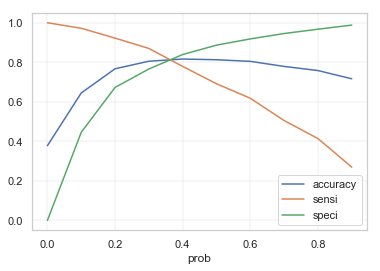

In [843]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [845]:
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.644739  0.972037  0.445764
0.2   0.2  0.767075  0.922326  0.672693
0.3   0.3  0.805336  0.869951  0.766055
0.4   0.4  0.816412  0.778961  0.839180
0.5   0.5  0.812888  0.691522  0.886670
0.6   0.6  0.804665  0.617843  0.918241
0.7   0.7  0.778990  0.505104  0.945494
0.8   0.8  0.758181  0.414115  0.967350
0.9   0.9  0.716395  0.269419  0.988127


From the above table and plot we can see that for cutoff value around 0.3 we are getting sensitivity of around 87% without compromising accuracy(80%). So the company can predict based on this and this will give them a lot of leads whom they can now contact for trying to convert them to paying customers. 

In [846]:
# Checking accuracy,sensitivity and specificity of train data for cutoff 0.3
train_2 = y_train_pred_final.copy()

train_2['final_predicted'] = train_2.Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)

print("Accuracy: {}".format(metrics.accuracy_score(train_2.Converted, train_2.final_predicted)))

confusion2 = metrics.confusion_matrix(train_2.Converted, train_2.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(TP / float(TP+FN)))
# Let us calculate specificity
print("Specificity: {}".format(TN / float(TN+FP)))

Accuracy: 0.8053364658499749
Sensitivity: 0.8699511762094985
Specificity: 0.7660550458715596


In [847]:
# Checking accuracy,sensitivity and specificity of test data for cutoff 0.3
test_2 = y_pred_final.copy()

test_2['final_predicted'] = test_2.Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)

print("Accuracy: {}".format(metrics.accuracy_score(test_2.Converted, test_2.final_predicted)))

confusion2 = metrics.confusion_matrix(test_2.Converted, test_2.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(TP / float(TP+FN)))
# Let us calculate specificity
print("Specificity: {}".format(TN / float(TN+FP)))

Accuracy: 0.7913077525450274
Sensitivity: 0.8667366211962224
Specificity: 0.7464084946908183


** 4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage. **

In this case the company doesn't want to make useless phone calls , so the model whcih is used to predict leads needs to have low FPR(false positivity rate). The cutoff values should be high so that false positives are avoided. Since FPR = 1 - Specificity, the Specificity of the model needs to be high in this scenario. The specificity of the model will increase with increasing in cutoff value.

In [848]:
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.644739  0.972037  0.445764
0.2   0.2  0.767075  0.922326  0.672693
0.3   0.3  0.805336  0.869951  0.766055
0.4   0.4  0.816412  0.778961  0.839180
0.5   0.5  0.812888  0.691522  0.886670
0.6   0.6  0.804665  0.617843  0.918241
0.7   0.7  0.778990  0.505104  0.945494
0.8   0.8  0.758181  0.414115  0.967350
0.9   0.9  0.716395  0.269419  0.988127


For cutoff value 0.6, the specificity is around 0.91 and accuracy is 0.8. So based on this cutoff the company can pursue the identified hot leads(converted value 1) and it will ensure that the company is making as less phone calls as possible.

In [849]:
# Checking accuracy,sensitivity and specificity of train data for cutoff 0.6
train_3 = y_train_pred_final.copy()

train_3['final_predicted'] = train_3.Conv_Prob.map(lambda x: 1 if x > 0.6 else 0)

print("Accuracy: {}".format(metrics.accuracy_score(train_3.Converted, train_3.final_predicted)))

confusion2 = metrics.confusion_matrix(train_3.Converted, train_3.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(TP / float(TP+FN)))
# Let us calculate specificity
print("Specificity: {}".format(TN / float(TN+FP)))

Accuracy: 0.8046652122839403
Sensitivity: 0.6178428761651131
Specificity: 0.9182406907717215


In [850]:
# Checking accuracy,sensitivity and specificity of test data for cutoff 0.6
test_3 = y_pred_final.copy()

test_3['final_predicted'] = test_3.Conv_Prob.map(lambda x: 1 if x > 0.6 else 0)

print("Accuracy: {}".format(metrics.accuracy_score(test_3.Converted, test_3.final_predicted)))

confusion2 = metrics.confusion_matrix(test_3.Converted, test_3.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(TP / float(TP+FN)))
# Let us calculate specificity
print("Specificity: {}".format(TN / float(TN+FP)))

Accuracy: 0.8206734534064213
Sensitivity: 0.6505771248688352
Specificity: 0.9219237976264835
